In [80]:
import os
import pickle
import pandas as pd
import numpy as np
import math

In [6]:
def get_predictionfile() :
    filenames = os.listdir(data_for_prediction)
    filenames = [filename.split('.')[0] for filename in filenames if filename.endswith('.txt')]
    print(len(filenames)) 
    # print(filenames[:3])  
    return filenames

def dump_dictionary(dictionary, filename):
    with open(filename, 'wb') as f:
        pickle.dump(dictionary, f)

In [7]:
unique_sub = set()
unique_enzyme = set()
unique_pair = set()

Domain_A_kcat_count = dict()
Domain_B_kcat_count = dict()
Domain_E_kcat_count = dict()
EC_kcat_count = dict()

new_columns = ['protein', 'org', 'domain','ko','rxn', 'ec', 'compound', 'kcat', 'km']
a = pd.read_table(data_for_prediction + 'rat.txt', sep='\t', header=None,names = new_columns)
a['pair'] = a['protein'] + '&' + a['compound']
#print(a)
newdf = a[['pair', 'kcat']] # 取出其中两列

newdf = newdf.drop_duplicates(subset=['pair'], keep='first') 
newdict = dict(zip(newdf['pair'],newdf['kcat']))

if a['domain'][2] == 'B':
    Domain_B_kcat_count.update(newdict)
elif a['domain'][2] == 'A':
    Domain_A_kcat_count.update(newdict)
elif a['domain'][2] == 'E':
    Domain_E_kcat_count.update(newdict)
print(a['compound'].values)
unique_sub.update(a['compound'].values)
     
unique_enzyme.update(a['protein'].values)
unique_pair.update(a['pair'].values)
#print(unique_pair)
for i in range(1,7):
    index = a['ec'].str.startswith( str(i)+'.',na=False)
    newdf = a[index] # 取出其中两列
    newdf = newdf[['pair', 'kcat']]
    print(newdf)
    newdf = newdf.drop_duplicates(subset=['pair'], keep='first')
    if 'ec' + str(i) not in newdf.keys():
        EC_kcat_count['ec' + str(i)] = (newdf['kcat'].values)
        #print(EC_kcat_count)
    else:
        EC_kcat_count['ec' + str(i)] = EC_kcat_count['ec' + str(i)].append(newdf['kcat'].values)
        

['C00058' 'C01304' 'C00073' ... 'C06196' 'C16617' 'C04646']
                  pair     kcat
4     M949_0349&C01528   2.5738
5     M949_0349&C05684   2.3613
6     M949_0349&C18902   1.4882
7     M949_0349&C05703   1.4882
17    M949_0387&C00041  10.7660
...                ...      ...
2163  M949_2122&C00527   0.4041
2164  M949_2122&C00011   1.8216
2167  M949_2122&C00026   0.3853
2168  M949_2122&C00091   0.3787
2169  M949_2122&C00011   1.8216

[458 rows x 2 columns]
                  pair     kcat
2     M949_1575&C00073   9.3771
3     M949_1575&C05198   8.2317
8     M949_0371&C04478   7.2545
9     M949_0371&C00074   6.6953
10    M949_0371&C01112  12.0562
...                ...      ...
2171  M949_0988&C00092   4.0280
2172  M949_0988&C00221   3.9325
2173  M949_0988&C01172   4.0280
2174  M949_0988&C00267   3.9325
2175  M949_0988&C00668   4.0280

[915 rows x 2 columns]
                  pair     kcat
0     M949_0864&C00058   2.2553
1     M949_0864&C01304   2.0443
35    M949_2183&C00130  29.1

In [264]:
data_for_prediction = '../../dataPredict/output/MainData/'
# load data
filenames = get_predictionfile()

print(filenames[1])
i = 1
unique_sub = set()
unique_enzyme = set()
unique_pair = set()

Domain_A_kcat_count = dict()
Domain_B_kcat_count = dict()
Domain_E_kcat_count = dict()
EC_kcat_count = dict()

for file in filenames:
    i+=1
    if i%1000 == 0:
        print('This is:' + str(i)) 
    #print(data_for_prediction + file + '.txt')
    new_columns = ['protein', 'org', 'domain','ko','rxn', 'ec', 'compound', 'kcat', 'km']
    a = pd.read_table(data_for_prediction + file + '.txt', sep='\t', header=None,names = new_columns)
    a['pair'] = a['protein'].map(str) + '&' + a['compound']
    #print(a)
    newdf = a[['pair', 'kcat']] # 取出其中两列

    newdf = newdf.drop_duplicates(subset=['pair'], keep='first') 
    #newdict = dict(zip(newdf['pair'],newdf['kcat']))
    allvalues = list(newdf['kcat'])
    #print(len(allvalues))

    if a['domain'][2] == 'B':
        Domain_B_kcat_count[file] = allvalues
    elif a['domain'][2] == 'A':
        Domain_A_kcat_count[file] = allvalues
    elif a['domain'][2] == 'E':
        Domain_E_kcat_count[file] = allvalues
    #print(a['compound'].values)
    unique_sub.update(a['compound'].values)

    unique_enzyme.update(a['protein'].values)
    unique_pair.update(a['pair'].values)
    #print(unique_pair)
    for j in range(1,8):
        index = a['ec'].str.startswith( str(j)+'.',na=False)
        newdf = a[index] # extract lines starts with ecxxxx
        newdf = newdf[['pair', 'kcat']] # extract two columns
        #print(newdf)
        newdf = newdf.drop_duplicates(subset=['pair'], keep='first')
        if 'ec' + str(j) not in EC_kcat_count.keys():
            EC_kcat_count['ec' + str(j)] = newdf['kcat'].values
            #print(EC_kcat_count['ec' + str(j)])
        else:
            EC_kcat_count['ec' + str(j)] = np.append(EC_kcat_count['ec' + str(j)],newdf['kcat'].values)
            #print('ec' + str(j) + ':',str(len(EC_kcat_count['ec' + str(j)])))


dump_dictionary(unique_sub, 'unique_sub' + str(i) + '.pickle')
dump_dictionary(unique_enzyme, 'unique_enzyme'+ str(i) +'.pickle')
dump_dictionary(unique_pair, 'unique_pair'+ str(i) +'.pickle')
dump_dictionary(EC_kcat_count, 'EC_kcat_count' + str(i) + '.pickle')
dump_dictionary(Domain_A_kcat_count, 'Domain_A_kcat_count'+ str(i) +'.pickle')
dump_dictionary(Domain_B_kcat_count, 'Domain_B_kcat_count'+ str(i) +'.pickle')
dump_dictionary(Domain_E_kcat_count, 'Domain_E_kcat_count'+ str(i) +'.pickle')

8099
rat
This is:1000
This is:2000
This is:3000
This is:4000
This is:5000
This is:6000
This is:7000
This is:8000


In [265]:
len(unique_sub)

4147

In [266]:
len(unique_enzyme)

5825213

In [267]:
len(unique_pair)

25794195

In [268]:
print(len(count_species(Domain_A_kcat_count)))
print(len(count_species(Domain_B_kcat_count)))
print(len(count_species(Domain_E_kcat_count)))

389
6963
747


In [269]:
# get data
def count_species(dictWithvalues):
    count_res = list()
    for species in dictWithvalues.keys():
        #print(species)
        count_res.append(len(dictWithvalues[species]))
    return count_res

print(count_species(Domain_A_kcat_count))
    

[1733, 2666, 1506, 2404, 2636, 1717, 2116, 1371, 2701, 1808, 1715, 1700, 1462, 1816, 2298, 2221, 1318, 1756, 2178, 1548, 2260, 1670, 2217, 1693, 1596, 2819, 1500, 1666, 1472, 1474, 1392, 3198, 1796, 1524, 2245, 2237, 1722, 1517, 1731, 2039, 1313, 1744, 1716, 1707, 2224, 917, 3029, 2657, 1748, 1994, 1851, 2016, 2179, 1171, 2681, 1427, 2214, 1656, 2137, 2206, 1758, 2398, 1605, 2543, 2043, 1047, 2740, 3168, 1891, 1391, 1629, 1334, 2057, 2742, 1834, 1800, 2671, 1799, 2179, 1650, 1856, 1725, 2192, 1489, 1986, 1883, 2390, 2135, 2410, 1909, 1797, 2049, 1715, 2035, 2274, 1756, 1746, 2204, 1879, 2032, 2170, 1296, 1687, 1296, 1790, 1931, 2192, 1207, 1438, 1130, 2354, 2226, 1354, 1904, 2597, 1890, 2111, 1923, 1628, 2043, 1858, 1312, 1129, 564, 2159, 2055, 2370, 1977, 1530, 1966, 2676, 1609, 1500, 1556, 2032, 2048, 3142, 2626, 3861, 1946, 2812, 1976, 1933, 1525, 2628, 1582, 3227, 2911, 1496, 3185, 1271, 2609, 1964, 1519, 1498, 3084, 1689, 2456, 1823, 2399, 2597, 2242, 2003, 2456, 1956, 1533, 2353,

No handles with labels found to put in legend.


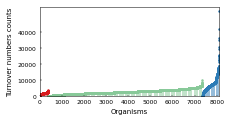

7354


In [306]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(3,1.5))

# To solve the 'Helvetica' font cannot be used in PDF file
# https://stackoverflow.com/questions/59845568/the-pdf-backend-does-not-currently-support-the-selected-font
plt.rcParams['pdf.fonttype'] = 42

plt.axes([0.12,0.12,0.83,0.83])

# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=0.4)


# plt.rc('font', family='Helvetica')
plt.xticks(list(np.arange(0,8100,1000)))

plt.xlabel('Organisms', fontsize=7)
plt.ylabel('Turnover numbers counts', fontsize=7)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(frameon=False, prop={"size":6})

ax = plt.gca()
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)

# Figure for archeae
index = len(count_species(Domain_A_kcat_count)) +1
x = list(range(1,index))
y = count_species(Domain_A_kcat_count)
y.sort()
plt.bar(x, y, color = '#d7191c',alpha=.5)
plt.scatter(x, y, color = '#d7191c',s=1)

x = list(range(index + 1,index + 1 + len(count_species(Domain_B_kcat_count))))
index = index + len(count_species(Domain_B_kcat_count)) + 1
y = count_species(Domain_B_kcat_count)
y.sort()
plt.bar(x, y, color = '#88c999',alpha=.5)
plt.scatter(x, y, color = '#88c999',s=1)

x = list(range(index + 1,index + 1 +len(count_species(Domain_E_kcat_count))))
#print(x)
y = count_species(Domain_E_kcat_count)
y.sort()
plt.bar(x, y, color = '#2c7bb6',alpha=.5)
plt.scatter(x, y, color = '#2c7bb6',s=1)
#print(len(x))
#print(len(y))
plt.xlim([0,8099])
ax = plt.gca()


ax.axes.yaxis.set_ticks([0,10000,20000,30000,40000])
plt.savefig("Fig_NumOfValues.pdf", dpi=400, bbox_inches='tight')


plt.show()
print(index)

In [303]:
# distribution figure
def allvalues_out(dict_domain):
    #print(len(dict_domain.values()))
    result = [element for lis in dict_domain.values() for element in lis]
    result = np.array(result)
    result[result == 0] = 0.00001
    #print(len(result))
    return result


def distri_dig(y,color,leg):

    n, bins, patches=plt.hist(x=np.log10(y),bins = 200,
                          histtype='step',#直方图的类型默认为bar{'bar', 'barstacked', 'step', 'stepfilled'}
                          facecolor='black',#箱子颜色 
                          edgecolor=color,#箱子边框颜色
                          density=False,
                          alpha= 1,
                          label = leg,
                          linewidth=0.5)

    #print(len(n))#频数
    #print(len(bins))#箱子边界
    #print(patches)#箱子数

    return n,bins

Median of the Eukaryotes:  4.527
Median of the Bacteria:  5.2003
Median of the Archaea:  4.9525
Median of the Total:  5.0389
Ratio in 1/s to 100/s:  (1, 100]    0.745189
dtype: float64


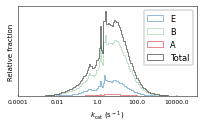

In [304]:
plt.figure(figsize=(3,1.5))
plt.rcParams['pdf.fonttype'] = 42

plt.axes([0.12,0.12,0.83,0.83])

# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=0.4)


# plt.rc('font', family='Helvetica')

plt.ylabel('Relative fraction', fontsize=7)
plt.xlabel('$k$$_\mathregular{cat}$ (s$^-$$^1$)', fontsize = 7)
#plt.legend(frameon=False, prop={"size":6})


ax = plt.gca()
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)



yE = allvalues_out(Domain_E_kcat_count)
print('Median of the Eukaryotes: ', str(np.median(yE)))
n,bins = distri_dig(yE,'#2c7bb6','E')
width = (bins[2] - bins[1])/2
#plt.plot(bins[:-1] + width,n,'-',color='#2c7bb6')

yB = allvalues_out(Domain_B_kcat_count)
print('Median of the Bacteria: ', str(np.median(yB)))
n,bins = distri_dig(yB,'#88c999','B')
#plt.plot(bins[:-1] + width,n,'-',color='#88c999')

yA = allvalues_out(Domain_A_kcat_count)
print('Median of the Archaea: ', str(np.median(yA)))
n,bins = distri_dig(yA,'#d7191c','A')
#plt.plot(bins[:-1] + width,n,'-',color='#d7191c')

# plot all data
y_all = np.append(yB, yE, axis=0)
y_all = np.append(c, yA, axis=0)
print('Median of the Total: ', str(np.median(y_all))) # calculate the meadian
# calculate ratio of values fall in 1/s to 100/s
cats=pd.cut(y_all,[1,100])
fraction = pd.value_counts(cats)/len(y_all)

print('Ratio in 1/s to 100/s: ', str(fraction))
n,bins = distri_dig(y_all,'black','Total')
#plt.plot(bins[:-1] + width,n,'-',color='black')
plt.xticks([-6.,-4.,-2.,0.,2.,4.,6.])

locs, labels = plt.xticks()
plt.xticks(locs[1:-1], np.power(10,locs)[1:-1], fontsize = 6)
ax = plt.gca()
ax.axes.yaxis.set_ticks([])
plt.xlim(-4,5)
#leg = plt.legend({'Total'},'Location','northwest','Fontsize',6,'FontName','Helvetica');
#leg.ItemTokenSize = [0,5];


plt.legend()
plt.savefig("Fig_Distributions.pdf", dpi=400, bbox_inches='tight')

plt.show()


In [ ]:
EC_kcat_count

In [ ]:
# plot for EC number
plt.figure(figsize=(3,1.5))

# To solve the 'Helvetica' font cannot be used in PDF file
# https://stackoverflow.com/questions/59845568/the-pdf-backend-does-not-currently-support-the-selected-font
plt.rcParams['pdf.fonttype'] = 42

plt.axes([0.12,0.12,0.83,0.83])

# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=0.4)


# plt.rc('font', family='Helvetica')
plt.xticks(list(np.arange(0,8100,1000)))

plt.xlabel('Ec number', fontsize=7)
plt.ylabel('Turnover numbers counts', fontsize=7)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(frameon=False, prop={"size":6})

ax = plt.gca()
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)

# Figure for EC number
EC_kcat_count
index = len(count_species(EC_kcat_count)) +1
x = list(range(1,index))
y = count_species(EC_kcat_count)
#y.sort()
plt.bar(x, y, facecolor = '#CBD4CE', edgecolor = 'black',alpha=1)
#plt.scatter(x, y, color = '#d7191c',s=0.1)


#ax.axes.yaxis.set_ticks([0,10000,20000,30000,40000])
plt.savefig("Fig_NumOfValues_EC.pdf", dpi=400, bbox_inches='tight')
plt.show()


Median of the ec 1 :  5.1846
Median of the ec 2 :  4.3286
Median of the ec 3 :  6.5182
Median of the ec 4 :  5.7836
Median of the ec 5 :  7.3239
Median of the ec 6 :  4.0426
Median of the ec 7 :  5.84675
7


No handles with labels found to put in legend.


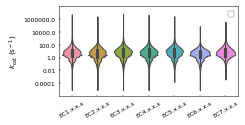

In [298]:
import seaborn as sns  


plt.figure(figsize=(3,1.5))
plt.rcParams['pdf.fonttype'] = 42

plt.axes([0.12,0.12,0.83,0.83])

# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=0.4)


# plt.rc('font', family='Helvetica')

plt.ylabel('$k$$_\mathregular{cat}$ (s$^-$$^1$)', fontsize=7)
#plt.xlabel('$k$$_\mathregular{cat}$ (s$^-$$^1$)', fontsize = 7)
#plt.legend(frameon=False, prop={"size":6})


ax = plt.gca()
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)

y_all = list()
for i in range(1,8):
    y = EC_kcat_count['ec' + str(i)]
    y[y == 0] = 0.00001
    y_all.append(np.log10(y))
    print('Median of the ec', str(i),': ',str(np.median(y)))
    #n,bins = distri_dig(y,'#2c7bb6','E')
    #sns.distplot(y, hist_kws={'cumulative': True, 'density': True}, kde_kws={'cumulative': True})
    #sns.ecdfplot(data=np.log10(y))


# plot all data
print(len(y_all))
#print('Median of the Total: ', str(np.median(y_all))) # calculate the meadian
# calculate ratio of values fall in 1/s to 100/s
#cats=pd.cut(y_all,[1,100])
#print(cats)

#fraction = pd.value_counts(cats)/len(y_all)

#print('Ratio in 1/s to 100/s: ', str(fraction))

#n,bins = distri_dig(y_all,'black','Total')
#sns.distplot(y_all, hist_kws={'cumulative': True, 'density': True}, kde_kws={'cumulative': True})
#sns.ecdfplot(data=np.log10(y_all))
#plt.plot(bins[:-1] + width,n,'-',color='black')
sns.violinplot(x=None, y=None, hue=None,
                   data=y_all, order=None, hue_order=None, 
                   bw='scott', cut=2, scale='area', scale_hue=True, 
                   gridsize=100, width=0.8, inner='box', split=False,
                   dodge=True, orient=None, linewidth=None,
                   color=None, palette=None, saturation=0.75,
                   ax=None)
sns.set_context("talk",font_scale=0.5,rc={"lines.linewidth":1})
#plt.xticks([-6.,-4.,-2.,0.,2.,4.,6.])
#plt.xlim([-4,5])
#locs, labels = plt.xticks()
#plt.xticks(locs[1:-1], np.power(10,locs)[1:-1], fontsize = 6)
#ax = plt.gca()
#ax.axes.yaxis.set_ticks([])

#leg = plt.legend({'Total'},'Location','northwest','Fontsize',6,'FontName','Helvetica');
#leg.ItemTokenSize = [0,5];

plt.yticks([-6.,-4.,-2.,0.,2.,4.,6.,8.])
plt.ylim([-6,8])
locs, labels = plt.yticks()
plt.yticks(locs[1:-1], np.power(10,locs)[1:-1], fontsize = 6)
ax = plt.gca()
labels = ax.set_xticklabels(['EC1.x.x.x','EC2.x.x.x','EC3.x.x.x','EC4.x.x.x','EC5.x.x.x','EC6.x.x.x','EC7.x.x.x'],rotation = 30,fontsize = 6)
plt.legend()
plt.savefig("Fig_Distributions_ec.pdf", dpi=400, bbox_inches='tight')

plt.show()



In [ ]:
plt.figure(figsize=(3,1.5))

# To solve the 'Helvetica' font cannot be used in PDF file
# https://stackoverflow.com/questions/59845568/the-pdf-backend-does-not-currently-support-the-selected-font
plt.rcParams['pdf.fonttype'] = 42

plt.axes([0.12,0.12,0.83,0.83])

# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=0.4)


# plt.rc('font', family='Helvetica')

plt.ylabel('Density', fontsize=7)
plt.xlabel('$k$$_\mathregular{cat}$ (s$^-$$^1$)', fontsize = 7)
plt.legend(frameon=False, prop={"size":6})


ax = plt.gca()
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)

# Figure for archeae


y = allvalues_out(Domain_E_kcat_count)
#plt.hist(np.log10(y),bins = 30,  facecolor = '#2c7bb6',alpha=1)
#sns.kdeplot(np.log10(y))
sns.distplot(x=np.log10(y),hist=False)



y = allvalues_out(Domain_B_kcat_count)
#plt.hist(np.log10(y),bins = 30,  facecolor = '#88c999',alpha=0.1)
#print(y)
#sns.kdeplot(np.log10(y))
sns.distplot(x=np.log10(y),hist=False)




y = allvalues_out(Domain_A_kcat_count)
#print(y)
#plt.hist(np.log10(y),bins = 30, facecolor = '#d7191c',alpha=0.1)
#sns.kdeplot(np.log10(y))
sns.distplot(x=np.log10(y),hist=False)

locs, labels = plt.xticks()
plt.xticks(locs[1:-1], np.power(10,locs)[1:-1], fontsize = 6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.savefig("Fig_distribution.pdf", dpi=400, bbox_inches='tight')

plt.show()


# Add patches to color the X axis labels 添加补丁以使X轴标签着色
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='#d7191c', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='#88c999', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='#2c7bb6', transform=fig.transFigure)


'''
matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)
xy: 2元组 矩形左下角xy坐标
width:矩形的宽度
height:矩形的高度
angle: float, 可选，矩形相对于x轴逆时针旋转角度，默认0
fill: bool, 可选，是否填充矩形
transform=fig.transFigure #确保矩形显示在图像最上方，如果我们对fig作画，不会被ax挡住
'''

fig.add_artist(p1)
fig.add_artist(p2)



AttributeError: 'BarContainer' object has no attribute 'Rectangle'